<a href="https://colab.research.google.com/github/agudoshnik/CSC-310-Individual-Project/blob/main/Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/csc310/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn import tree
from treeviz import tree_print

##**Original Data:**

In [ ]:
hawks = pd.read_csv(notes_home+"Hawks.csv")
hawks

,Unnamed: 0,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,2,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,3,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,4,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,5,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,904,11,18,2003,14:44,,1177-04777,RT,I,NaN,380.0,1525.0,26.0,27.6,224,227.0,NaN,NaN,3.0,0.0
904,905,11,19,2003,10:18,,803-05985,SS,I,F,190.0,175.0,12.7,15.4,150,153.0,NaN,NaN,4.0,0.0
905,906,11,19,2003,12:02,,1807-53145,RT,I,NaN,360.0,790.0,21.9,27.6,211,215.0,NaN,NaN,2.0,0.0
906,907,11,20,2003,9:56,,1177-04778,RT,I,NaN,369.0,860.0,25.2,28.0,207,210.0,NaN,NaN,2.0,0.0


In [ ]:
hawks.describe()

,Unnamed: 0,Month,Day,Year,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
count,908.00000,908.000000,908.000000,908.000000,907.000000,898.000000,901.000000,902.000000,908.000000,571.000000,75.000000,77.000000,567.000000,565.000000
mean,454.50000,9.842511,15.740088,1998.253304,315.637486,772.080178,21.801498,26.410865,198.831498,199.182137,71.950667,0.792208,2.184303,0.234540
std,262.26132,0.685717,8.413164,3.454180,95.277591,462.311760,7.284175,17.734704,36.824403,38.197755,17.263204,0.878660,1.044073,0.461597
min,1.00000,8.000000,1.000000,1992.000000,37.200000,56.000000,8.600000,9.500000,119.000000,115.000000,24.700000,0.000000,0.000000,0.000000
25%,227.75000,9.000000,9.000000,1995.000000,202.000000,185.000000,12.800000,15.100000,160.000000,162.000000,55.600000,0.000000,2.000000,0.000000
50%,454.50000,10.000000,16.000000,1999.000000,370.000000,970.000000,25.500000,29.400000,214.000000,215.000000,79.300000,1.000000,2.000000,0.000000
75%,681.25000,10.000000,23.000000,2001.000000,390.000000,1120.000000,27.300000,31.400000,225.000000,226.000000,87.000000,1.000000,3.000000,0.250000
max,908.00000,11.000000,31.000000,2003.000000,480.000000,2030.000000,39.200000,341.400000,288.000000,335.000000,94.000000,3.000000,4.000000,5.000000


In [ ]:
hawks.count()

Unnamed: 0      908
Month           908
Day             908
Year            908
CaptureTime     908
ReleaseTime     907
BandNumber      908
Species         908
Age             908
Sex             332
Wing            907
Weight          898
Culmen          901
Hallux          902
Tail            908
StandardTail    571
Tarsus           75
WingPitFat       77
KeelFat         567
Crop            565
dtype: int64

##**Project Proposal:**

The dataset I will be using is about a bunch of hawks that were caught, tagged, measured and released between 1992 and 2003.  

Rows: 908  

Columns: 20 

Target Label: No 

Numerical Columns: 14  

Categorical: 6 

For this project and to make it about machine learning I will cut the data set down to Species, Culmen, Hallux, Wing, Weight, and Tail. I want to do this data cleaning since some columns such as Tarsus since it only has 75 entries out of 908 maximum entries. This eliminates the really bad rows of data and give the project the goal about **if a machine can figure out what bird is which from the measurements given**.

In [ ]:
df = hawks[['Species', 'Wing', 'Weight','Culmen','Hallux','Tail']]

In [ ]:
df = df.replace('RT','Red-Tailed')
df = df.replace('CH','Coopers Hawk')
df = df.replace('SS','Sharp-Shinned')
df = df.dropna()

##**Modified Data:**

In [ ]:
df

,Species,Wing,Weight,Culmen,Hallux,Tail
0,Red-Tailed,385.0,920.0,25.7,30.1,219
2,Red-Tailed,381.0,990.0,26.7,31.3,235
3,Coopers Hawk,265.0,470.0,18.7,23.5,220
4,Sharp-Shinned,205.0,170.0,12.5,14.3,157
5,Red-Tailed,412.0,1090.0,28.5,32.2,230
...,...,...,...,...,...,...
903,Red-Tailed,380.0,1525.0,26.0,27.6,224
904,Sharp-Shinned,190.0,175.0,12.7,15.4,150
905,Red-Tailed,360.0,790.0,21.9,27.6,211
906,Red-Tailed,369.0,860.0,25.2,28.0,207


Dataset after Adjustments: 

Rows: 891 

Columns: 6 

Target Label: Species 

Numerical Columns: 5 

Categorical Columns: 1 

Since there were a few NA’s in the remaining data I dropped the entire row to make the project easier.  

##**Question:**
Now that the dataset is cleaned up, I want to answer the question, from the given measurements, can the type of hawk between Red-Tailed, Coopers, or Sharp-Shinned be determined, is there a pattern to determine which hawk is which. 


##**Data Summary:**

In [ ]:
df.count()

Species    891
Wing       891
Weight     891
Culmen     891
Hallux     891
Tail       891
dtype: int64

In [ ]:
df.describe()

,Wing,Weight,Culmen,Hallux,Tail
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,315.947475,771.615039,21.808923,26.413244,198.893378
std,95.316699,462.936901,7.293190,17.825541,36.826634
min,37.200000,56.000000,8.600000,9.500000,119.000000
25%,202.000000,185.000000,12.800000,15.100000,160.000000
50%,370.000000,970.000000,25.500000,29.400000,214.000000
75%,390.000000,1120.000000,27.350000,31.400000,225.000000
max,480.000000,2030.000000,39.200000,341.400000,288.000000


In [ ]:
df.Species.value_counts()

Red-Tailed       567
Sharp-Shinned    255
Coopers Hawk      69
Name: Species, dtype: int64

##**Visuals of data:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41203a5438>,
      dtype=object)

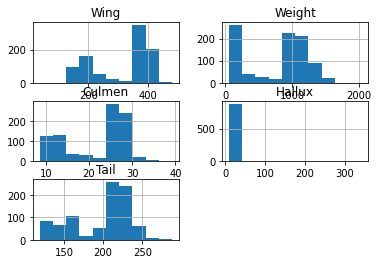

In [ ]:
df.hist()

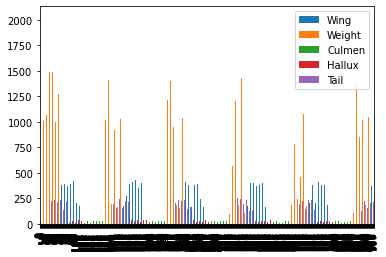

In [ ]:
df.plot.bar()

##**Decision Trees with 5 Cross Folds:**

Data Set Up:

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
# set up our sklearn data shape for the hawks data
X  = df.drop(['Species'],axis=1)
y = df['Species']

# split the data - 50% training 50% testing
datasets = train_test_split(X, y, train_size=0.3, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = datasets


##**Low-Complexity:**

In [ ]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

if Weight =< 700.0: 
  |then Sharp-Shinned
  |else Red-Tailed
<->
Tree Depth:  1
Train Accuracy: 0.91
Fold Accuracies: [0.91061453 0.90449438 0.92134831 0.92134831 0.92134831]
Accuracy: 0.92


##**Medium-Complexity:**

In [ ]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

if Culmen =< 20.950000762939453: 
  |then if Hallux =< 17.000000476837158: 
  |  |then Sharp-Shinned
  |  |else if Hallux =< 24.75: 
  |  |  |then Coopers Hawk
  |  |  |else Sharp-Shinned
  |else if Hallux =< 24.550000190734863: 
  |  |then if Culmen =< 26.199999809265137: 
  |  |  |then Coopers Hawk
  |  |  |else Red-Tailed
  |  |else Red-Tailed
<------->
Tree Depth:  3
Train Accuracy: 0.99
Fold Accuracies: [0.91061453 0.90449438 0.92134831 0.92134831 0.92134831]
Accuracy: 0.92


##**High-Complexity:**

In [ ]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

if Weight =< 700.0: 
  |then if Hallux =< 17.000000476837158: 
  |  |then Sharp-Shinned
  |  |else if Hallux =< 24.75: 
  |  |  |then Coopers Hawk
  |  |  |else if Tail =< 196.0: 
  |  |  |  |then Sharp-Shinned
  |  |  |  |else if Tail =< 202.5: 
  |  |  |  |  |then Red-Tailed
  |  |  |  |  |else Coopers Hawk
  |else if Hallux =< 24.550000190734863: 
  |  |then if Wing =< 386.5: 
  |  |  |then Coopers Hawk
  |  |  |else Red-Tailed
  |  |else Red-Tailed
<------------->
Tree Depth:  5
Train Accuracy: 1.00
Fold Accuracies: [0.91061453 0.90449438 0.92134831 0.92134831 0.92134831]
Accuracy: 0.92


##**Best Tree With Confusion Matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
from assets.confint import classification_confint
from sklearn.model_selection import GridSearchCV
# decision trees
model = tree.DecisionTreeClassifier(random_state=1)

# grid search
param_grid = {'max_depth': list(range(1,21)), 'criterion': ['entropy','gini'] }
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# build the confusion matrix
cm = confusion_matrix(y, predict_y)
cm_df = pd.DataFrame(cm)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'criterion': 'gini', 'max_depth': 5}
Accuracy: 1.00 (1.00,1.00)
Confusion Matrix:
    0    1    2
0  69    0    0
1   0  567    0
2   1    0  254


##**KNN:**

In [ ]:
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.neighbors import KNeighborsClassifier
# set up the model with k=3
model = KNeighborsClassifier(n_neighbors=3)

# do train-test
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)
model.fit(train_X, train_y)
predict_y = model.predict(test_X)
print("Train-Test Accuracy: {:3.2f}".format(accuracy_score(test_y, predict_y)))

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("XV Accuracy: {:3.2f}".format(scores.mean()))

Train-Test Accuracy: 0.98
Fold Accuracies: [0.99 0.95 0.99 0.98 1.00]
XV Accuracy: 0.98


##**KNN with Confusion Matrix:**

In [ ]:
# KNN
model = KNeighborsClassifier()

# grid search
param_grid = {'n_neighbors': list(range(1,51))}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X,y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# build the confusion matrix
cm = confusion_matrix(y, predict_y)
cm_df = pd.DataFrame(cm)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'n_neighbors': 2}
Accuracy: 0.99 (0.99,1.00)
Confusion Matrix:
    0    1    2
0  69    0    0
1   3  564    0
2   3    1  251


##**NonLinear-Regression:**
Is there any relation between Culmen(tip of beak) and Hallux(talon)?

R^2 score: 0.19


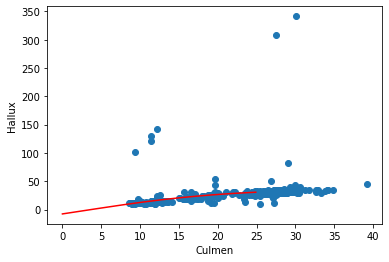

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
#model
model = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', max_iter=50000)
model.fit(df['Culmen'].values.reshape(-1,1),df['Hallux'])
# plot the model ontop of the data
plt.scatter(df['Culmen'],df['Hallux'])
plt.xlabel('Culmen')
plt.ylabel('Hallux')

x_ticks = np.arange(0,25.0,0.1)
y_ticks = model.predict(x_ticks.reshape(-1, 1))
plt.plot(x_ticks,y_ticks,"r-")

# compute the R^2 score 
rs = model.score(df['Culmen'].values.reshape(-1,1),df['Hallux'])
print("R^2 score: {:3.2f}".format(rs))

##**KNN Regression:**

Best parameters: {'n_neighbors': 10}
R^2 score: 0.25 (0.20, 0.30)


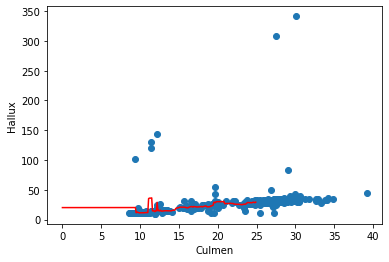

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from assets.confint import regression_confint
X = df['Culmen'].values.reshape(-1,1)
y = df['Hallux']
# setting up grid search
model = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1,11))}
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# plot the best model ontop of the data
plt.scatter(df['Culmen'],df['Hallux'])
plt.xlabel('Culmen')
plt.ylabel('Hallux')

best_model = grid.best_estimator_
x_ticks = np.arange(0,25.0,0.1)
y_ticks = best_model.predict(x_ticks.reshape(-1, 1))
plt.plot(x_ticks,y_ticks,"r-")

# compute the R^2 score and CI of the best model
rs = best_model.score(df['Culmen'].values.reshape(-1,1),df['Hallux'])
obs = df.shape[0]
vars = 1
lb, ub = regression_confint(rs, obs, vars)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs,lb,ub))

Is there any relation between Wing and Tail?

Best parameters: {'n_neighbors': 10}
R^2 score: 0.89 (0.87, 0.90)


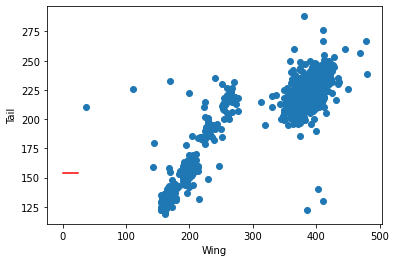

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from assets.confint import regression_confint
X = df['Wing'].values.reshape(-1,1)
y = df['Tail']
# setting up grid search
model = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1,11))}
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# plot the best model ontop of the data
plt.scatter(df['Wing'],df['Tail'])
plt.xlabel('Wing')
plt.ylabel('Tail')

best_model = grid.best_estimator_
x_ticks = np.arange(0,25.0,0.1)
y_ticks = best_model.predict(x_ticks.reshape(-1, 1))
plt.plot(x_ticks,y_ticks,"r-")

# compute the R^2 score and CI of the best model
rs = best_model.score(df['Wing'].values.reshape(-1,1),df['Tail'])
obs = df.shape[0]
vars = 1
lb, ub = regression_confint(rs, obs, vars)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs,lb,ub))

Is there any relation between Wing and Hallux?

Best parameters: {'n_neighbors': 9}
R^2 score: 0.26 (0.21, 0.31)


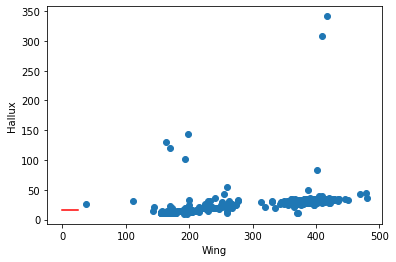

In [ ]:
X = df['Wing'].values.reshape(-1,1)
y = df['Hallux']
# setting up grid search
model = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1,11))}
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# plot the best model ontop of the data
plt.scatter(df['Wing'],df['Hallux'])
plt.xlabel('Wing')
plt.ylabel('Hallux')

best_model = grid.best_estimator_
x_ticks = np.arange(0,25.0,0.1)
y_ticks = best_model.predict(x_ticks.reshape(-1, 1))
plt.plot(x_ticks,y_ticks,"r-")

# compute the R^2 score and CI of the best model
rs = best_model.score(df['Wing'].values.reshape(-1,1),df['Hallux'])
obs = df.shape[0]
vars = 1
lb, ub = regression_confint(rs, obs, vars)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs,lb,ub))

Is there any relation between Culmen and Tail?

Best parameters: {'n_neighbors': 10}
R^2 score: 0.89 (0.88, 0.91)


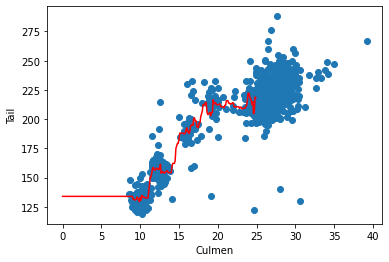

In [ ]:
X = df['Culmen'].values.reshape(-1,1)
y = df['Tail']
# setting up grid search
model = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1,11))}
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# plot the best model ontop of the data
plt.scatter(df['Culmen'],df['Tail'])
plt.xlabel('Culmen')
plt.ylabel('Tail')

best_model = grid.best_estimator_
x_ticks = np.arange(0,25.0,0.1)
y_ticks = best_model.predict(x_ticks.reshape(-1, 1))
plt.plot(x_ticks,y_ticks,"r-")

# compute the R^2 score and CI of the best model
rs = best_model.score(df['Culmen'].values.reshape(-1,1),df['Tail'])
obs = df.shape[0]
vars = 1
lb, ub = regression_confint(rs, obs, vars)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs,lb,ub))

##**Analysis:**
##Decesion Trees:
For the most part, since the data became really clean and organized, all of the decesion trees were accurate with guessing type of hawk depending on the informarion given even at really low learning rates of only having 30% given with low testing to give the tree less chances of getting the data right. So from just knowing the Culmen length or Weight, it is very easily possible to determine the type of hawk between Red-Tailed, Sharp-Shinned, and Cooper's Hawk. The best tree was KNN(.98 accuracy) vs medium and low- complexity at .92 accuracy.
##Regression Models:
Culmen and Hallux:
From the regression model I have learned Culmen(part of a bird's beak) and Hallux(talon) have very little to do with each other. So with knowledge about a Culmen, it would be very unlikely to guess a Hallux. (.25 score)

Wing and Tail: 
From the regression model I have learned Wing and Tail are related . So with knowledge about a Wing, it would be very likely to guess a Tail.     (.89 score)

Wing and Hallux:
From the regression model I have learned Wing and Hallux are  not related. So with knowledge about a Wing, it would be very likely to guess a Hallux.(.26 score)

Culmen and Tail: 
From the regression model I have learned Culmen and Tail are related . So with knowledge about a Culmen, it would be very likely to guess a Tail.
(.89 score)